In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('heart_disease.csv')

In [3]:
data.head()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    int64  
 13  thal        303 non-null    int64  
 14  target      303 non-null    int64  
dtypes: float64(1), int64(14)
memory usage: 35.6 KB


In [8]:
data= data.drop(['Unnamed: 0'],axis=1)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [10]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [12]:
data.shape

(303, 14)

In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

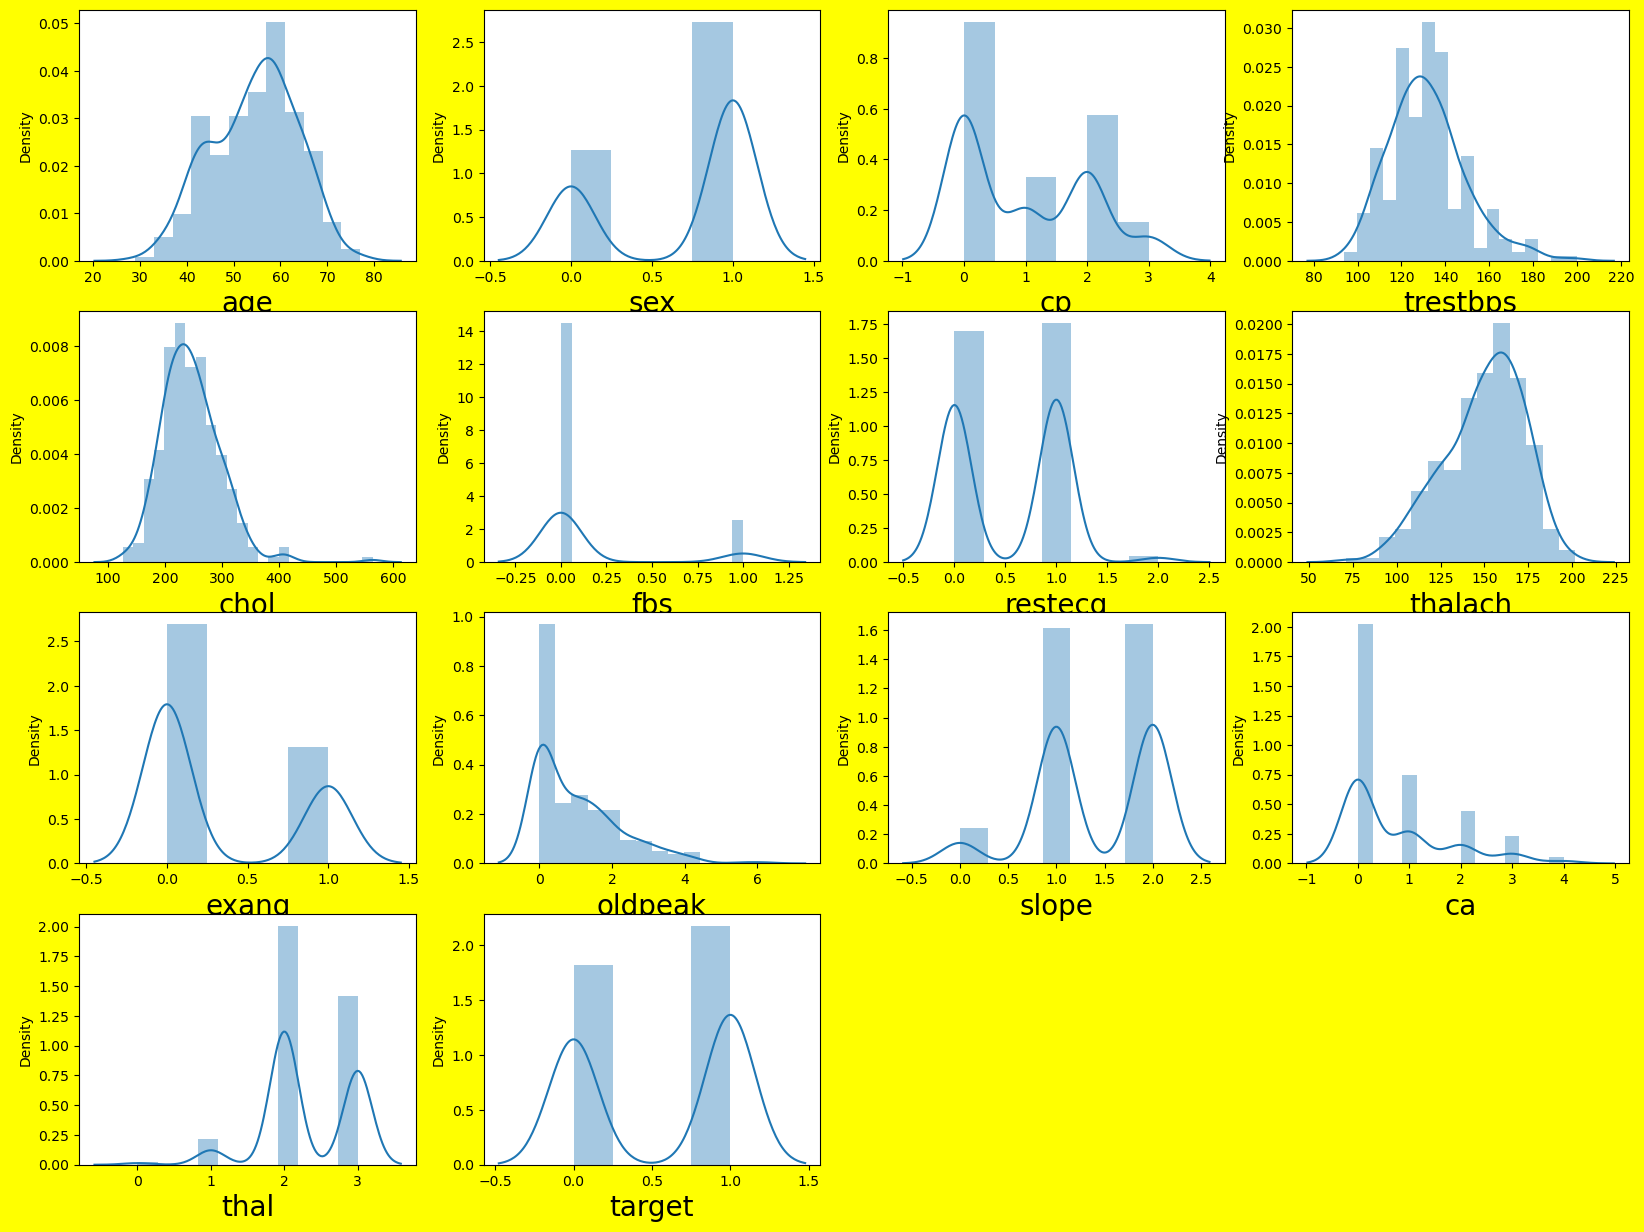

In [15]:
plt.figure(figsize=(20,15),facecolor ='yellow')
plotnumber =1
for column in data:
    if plotnumber <=14:
        ax= plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [16]:
df_feature = data.drop('target',axis=1)

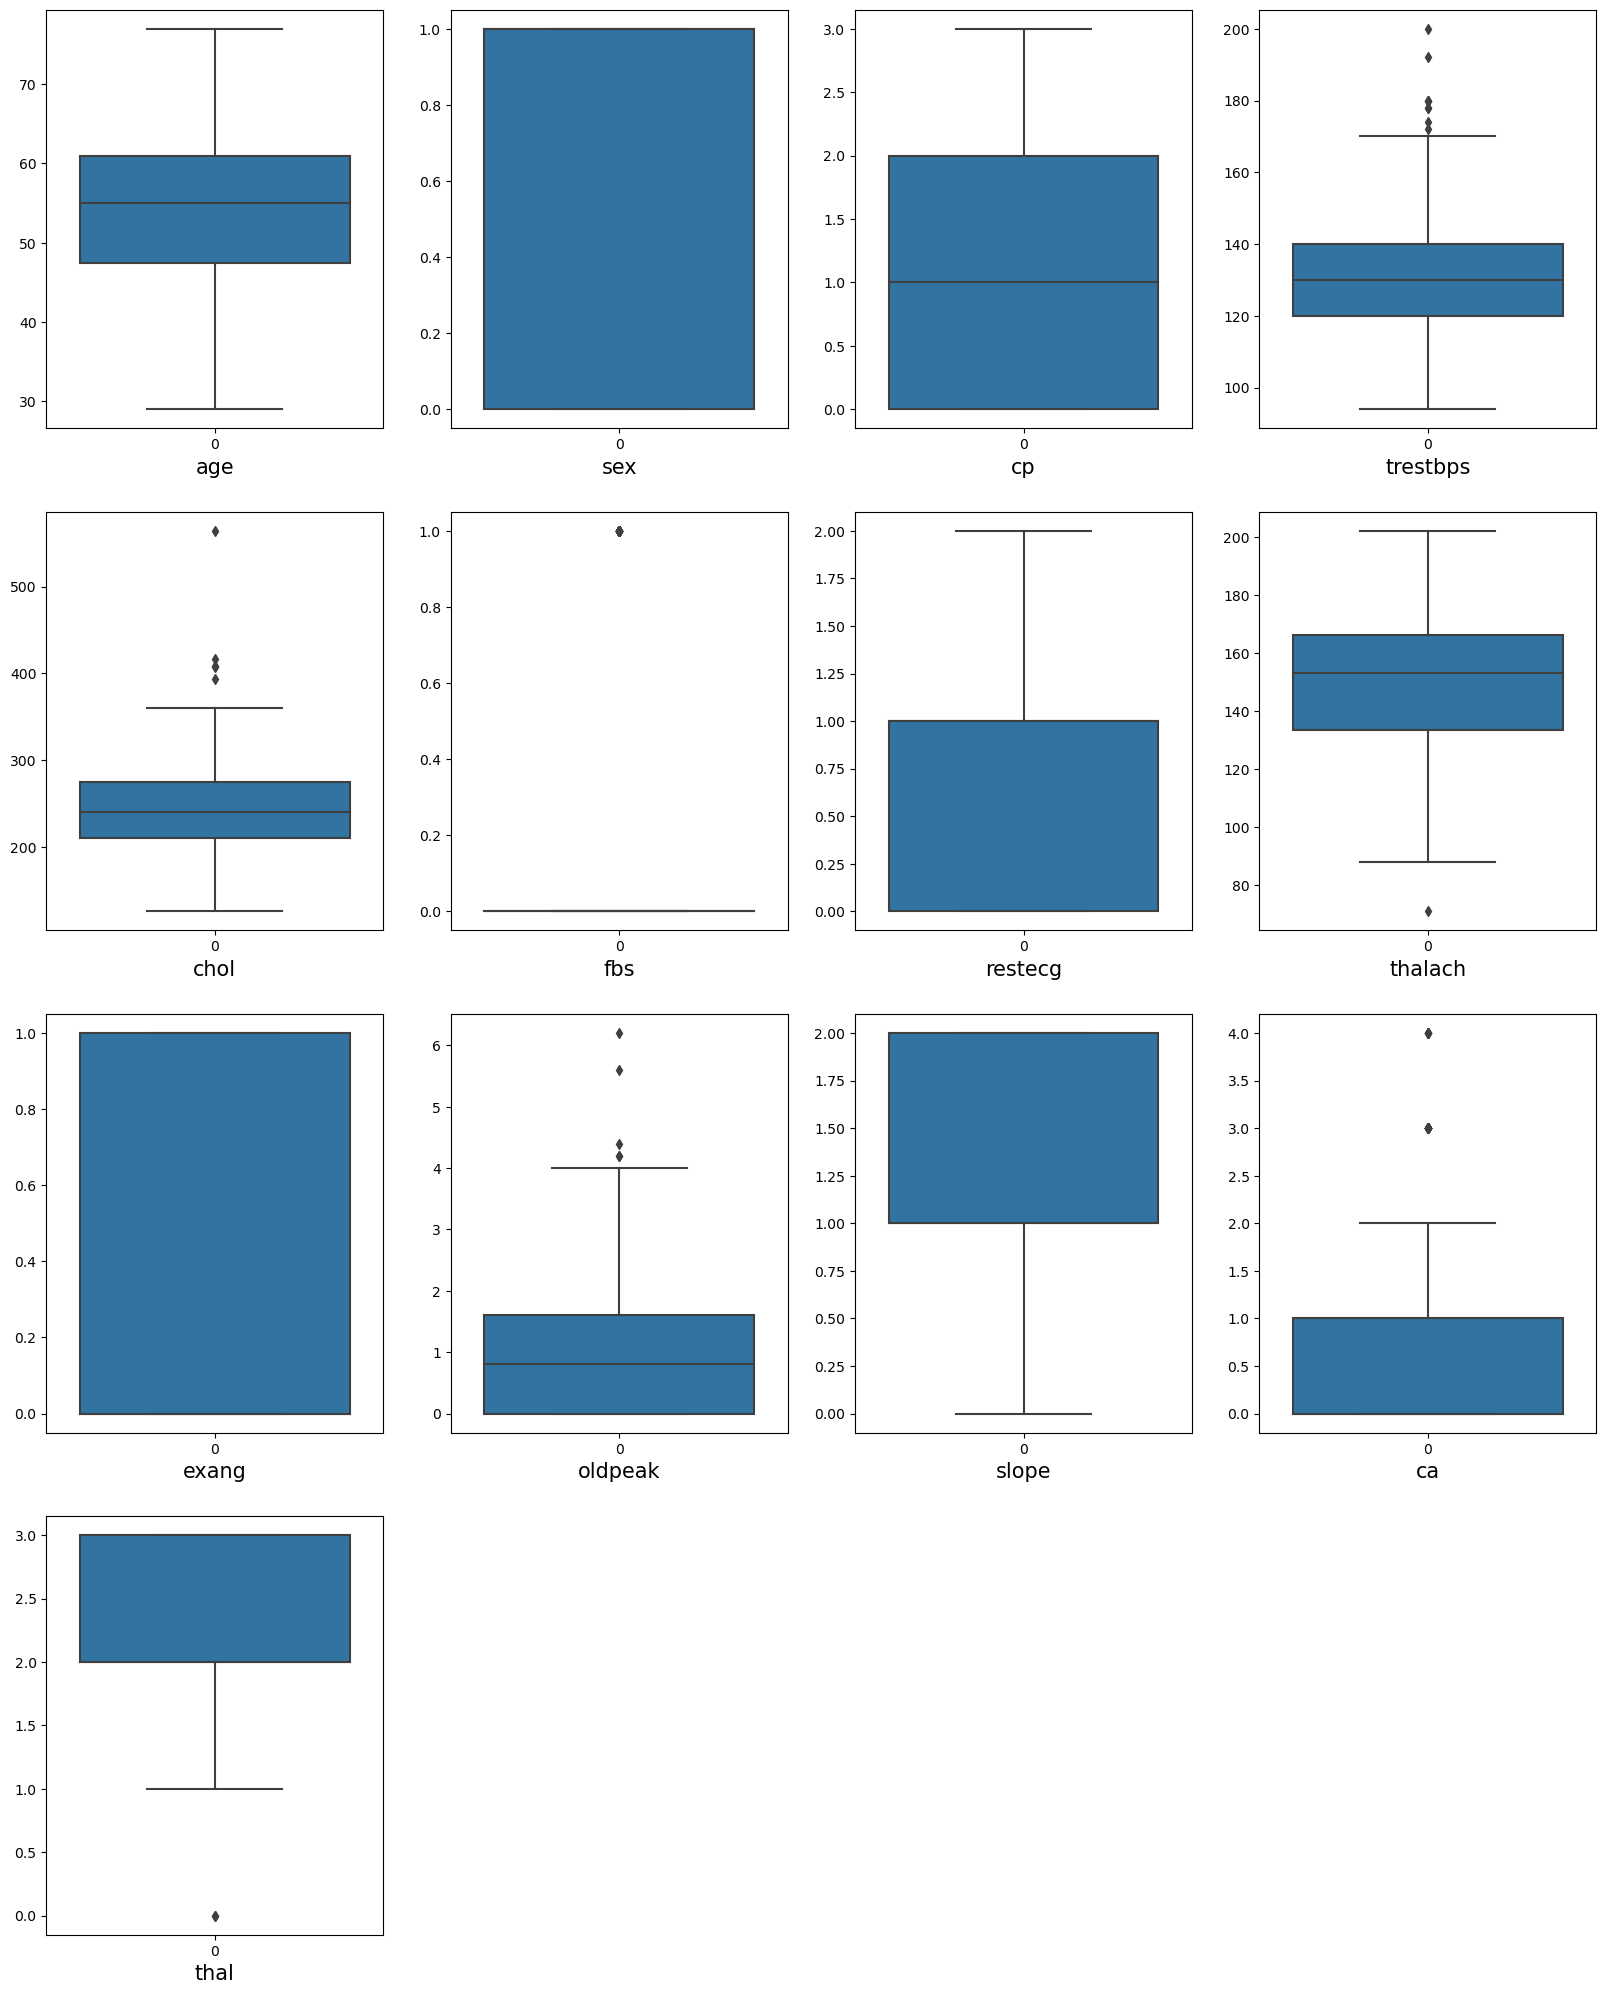

In [17]:
plt.figure(figsize=(20,25))
graph =1
for column in df_feature:
    if graph <=14:
        plt.subplot(4,4,graph)
        ax=sns.boxplot(data=df_feature[column])
        plt.xlabel(column,fontsize=15)
    graph +=1
plt.show()

In [18]:
q1 = data.quantile(0.25)
q3 = data.quantile(0.75)
iqr = q3-q1

In [19]:
trestbps_high = (q3.trestbps+ (1.5*iqr.trestbps))
print(trestbps_high)
index =np.where(data['trestbps']>trestbps_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

170.0
(294, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
290,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
291,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
292,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [20]:
chol_high = (q3.chol+ (1.5*iqr.chol))
print(chol_high)
index =np.where(data['chol']>chol_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

369.75
(289, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
285,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
286,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
287,301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [21]:
thalach_low = (q3.thalach-(1.5*iqr.thalach))
print(thalach_low)
index =np.where(data['thalach']<thalach_low)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

117.25
(257, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
253,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
254,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
255,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [22]:
old_peak_high = (q3.oldpeak+(1.5*iqr.oldpeak))
print(old_peak_high)
index =np.where(data['oldpeak']>old_peak_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

4.0
(254, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
249,296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
250,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
251,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
252,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [23]:
ca_high = (q3.ca+(1.5*iqr.ca))
print(ca_high)
index =np.where(data['ca']>ca_high)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

2.5
(237, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232,296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
233,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
234,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
235,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [24]:
thal_low = (q3.thal-(1.5*iqr.thal))
print(thal_low)
index =np.where(data['thal']<thal_low)
data = data.drop(data.index[index])
print(data.shape)
data.reset_index()

1.5
(223, 14)


,index,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
1,2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
2,3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
3,4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
4,6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
218,296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
219,298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
220,299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
221,300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0


In [25]:
data= data.drop(['sex'],axis=1)
data=data.drop(['fbs'],axis=1)
data= data.drop(['exang'],axis=1)

In [26]:
data.shape

(223, 11)

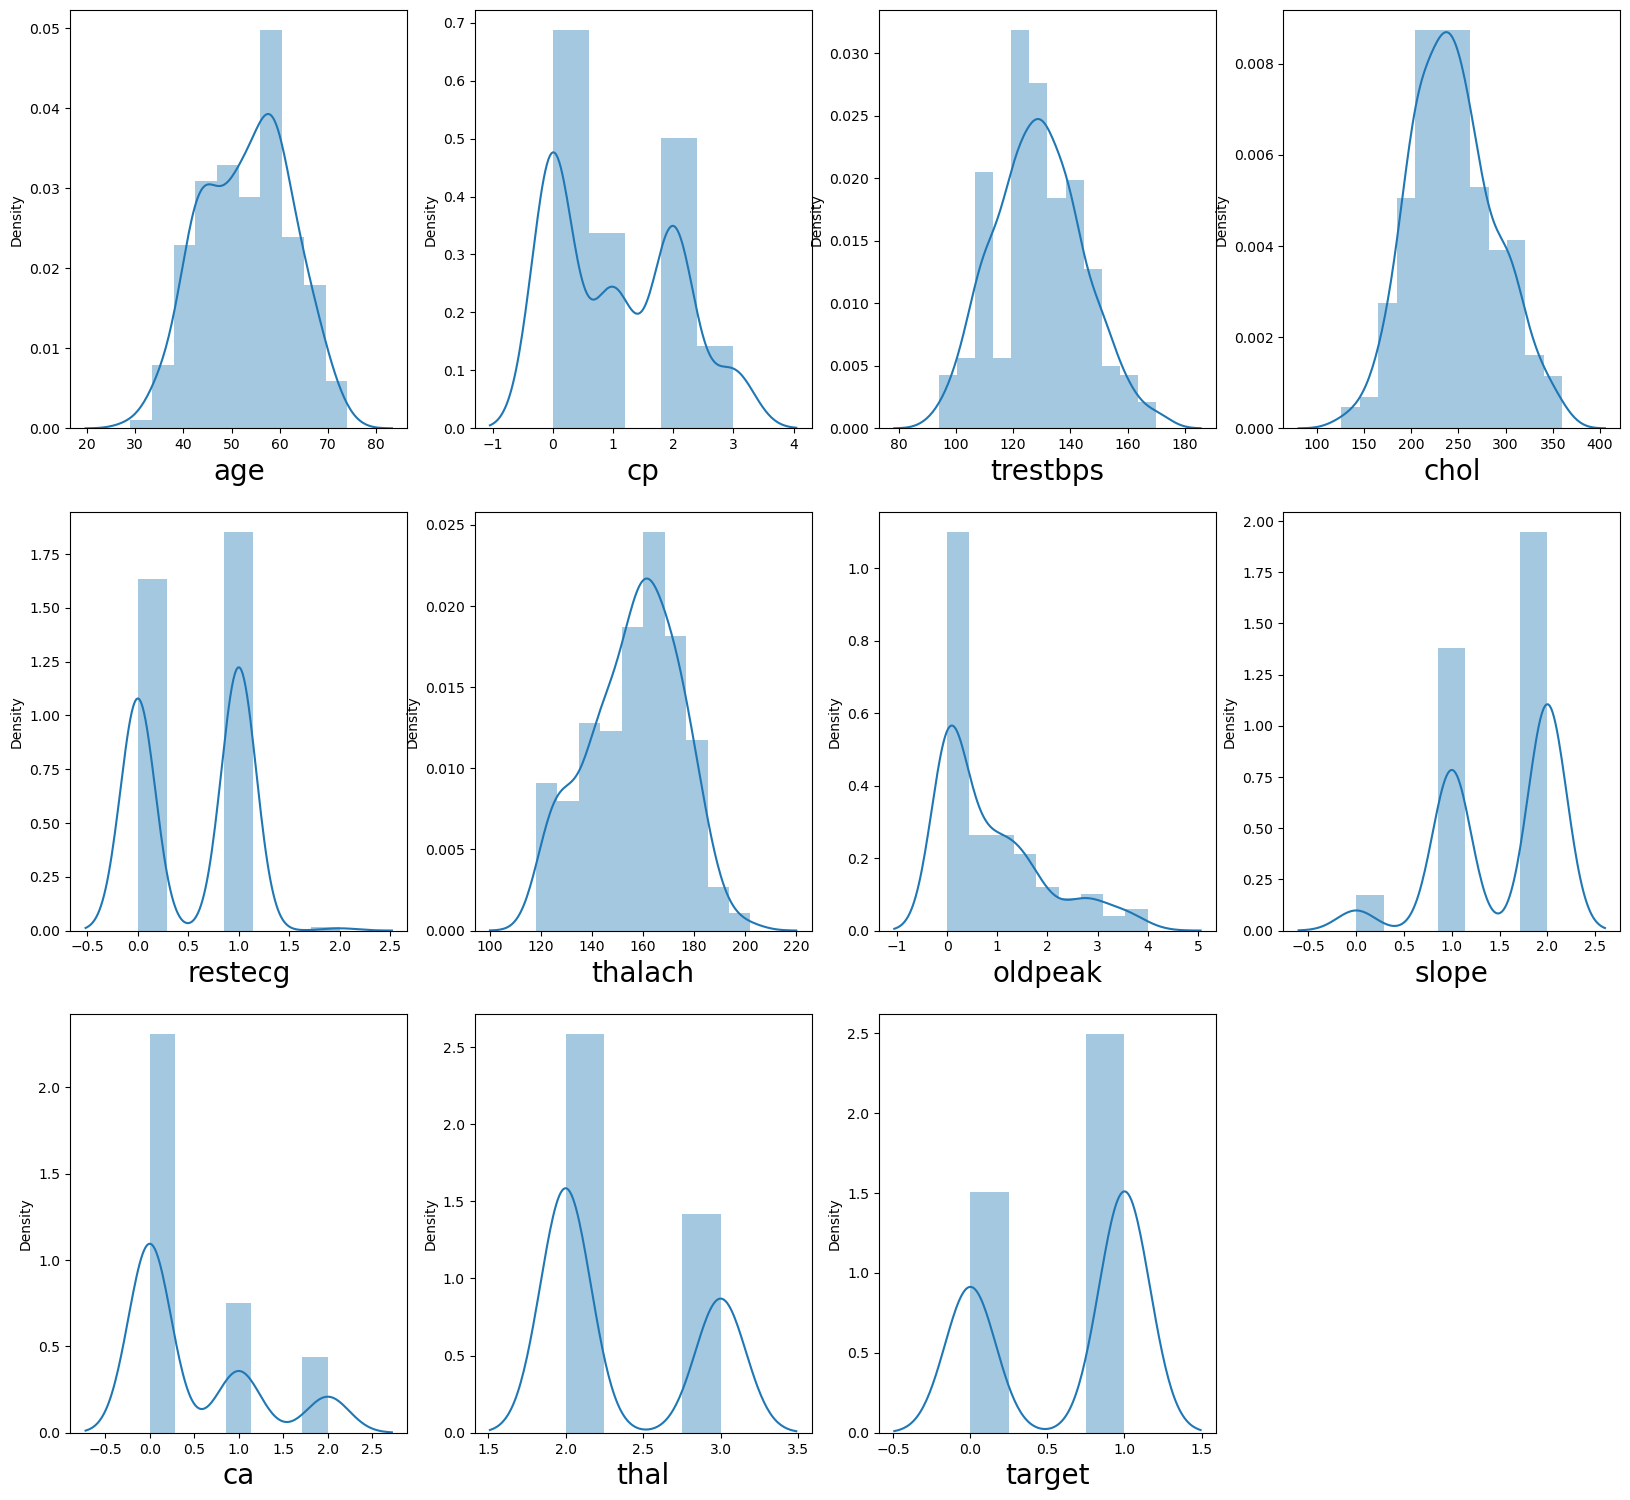

In [27]:
plt.figure(figsize =(20,25))
plotnumber = 1
for column in data:
    if plotnumber<=11:
        ax = plt.subplot(4,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=20)
    plotnumber +=1
plt.show()

In [28]:
x=data.drop(columns =['target'])
y=data['target']

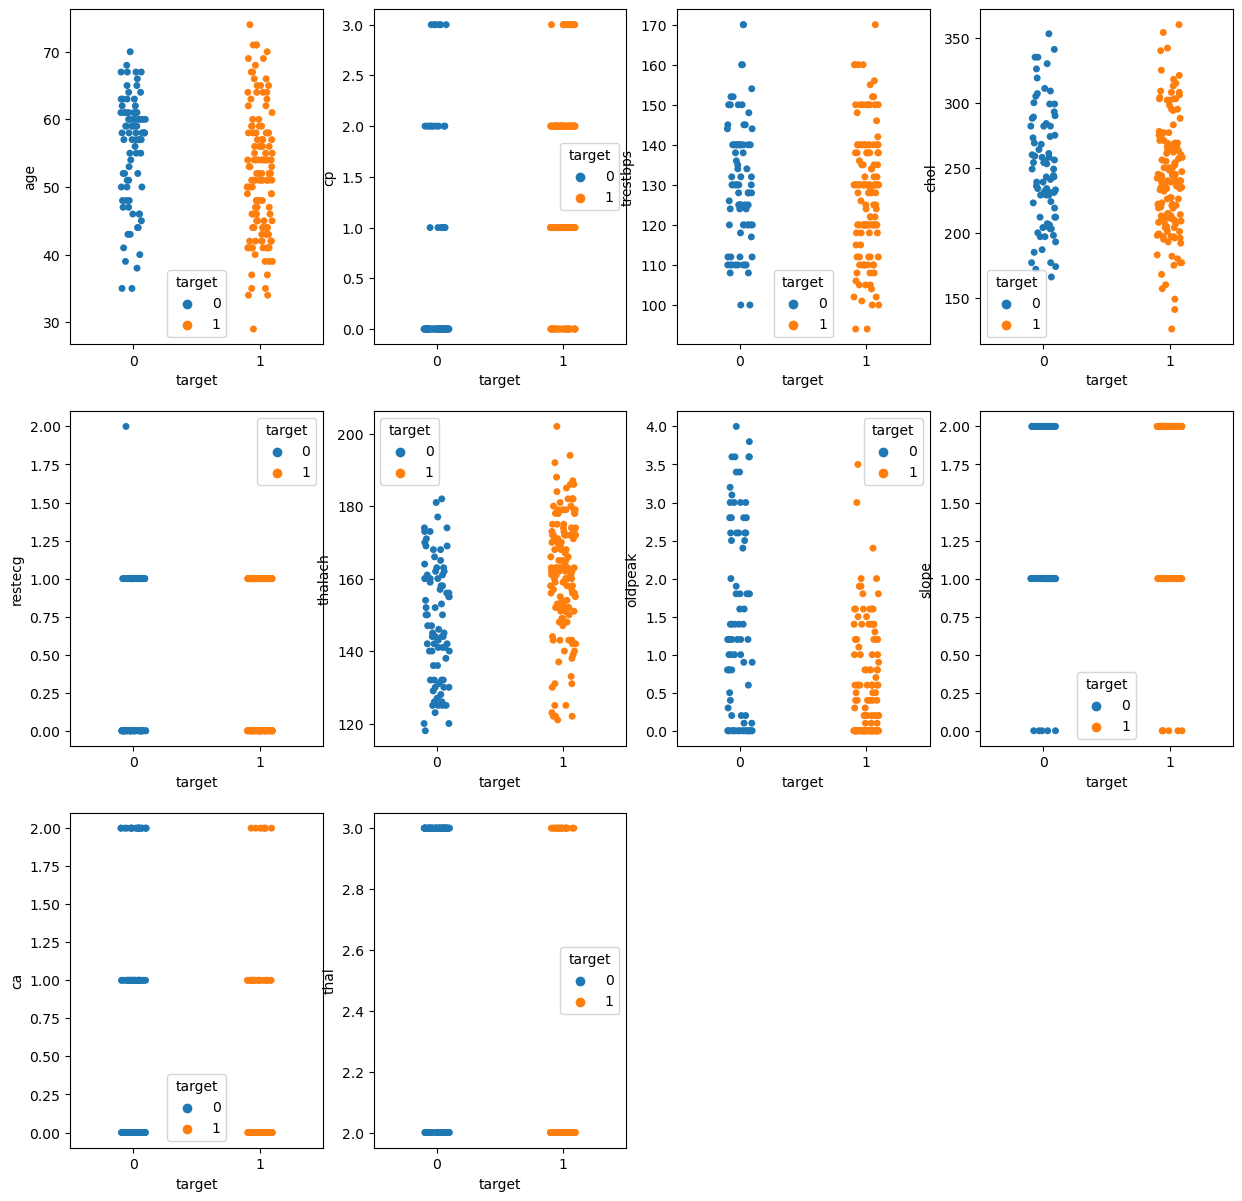

In [30]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in x:
    if plotnumber <=11:
        ax= plt.subplot(4,4,plotnumber)
        sns.stripplot(x=y,y=x[column],hue=y)
    plotnumber +=1
plt.show()

In [31]:
scaler= StandardScaler()
x_scaled = scaler.fit_transform(x)

In [32]:
x_scaled.shape[1]

10

In [33]:
vif = pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i)for i in range(x_scaled.shape[1])]
vif['Features']=x.columns


vif

,vif,Features
0,1.566061,age
1,1.157485,cp
2,1.196897,trestbps
3,1.053578,chol
4,1.076433,restecg
5,1.475859,thalach
6,1.597539,oldpeak
7,1.455774,slope
8,1.330066,ca
9,1.231912,thal


In [34]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.25,random_state =355)

In [35]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

In [36]:
y_pred= log_reg.predict(x_test)

In [37]:
y_pred

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [38]:
log_reg.predict_proba(x_test)

array([[0.017346  , 0.982654  ],
       [0.91789766, 0.08210234],
       [0.28829967, 0.71170033],
       [0.98519198, 0.01480802],
       [0.25530172, 0.74469828],
       [0.04004817, 0.95995183],
       [0.24458367, 0.75541633],
       [0.39456186, 0.60543814],
       [0.0555508 , 0.9444492 ],
       [0.67628812, 0.32371188],
       [0.00863857, 0.99136143],
       [0.77813763, 0.22186237],
       [0.22689826, 0.77310174],
       [0.98347718, 0.01652282],
       [0.00964601, 0.99035399],
       [0.61806512, 0.38193488],
       [0.36093855, 0.63906145],
       [0.01522495, 0.98477505],
       [0.98841597, 0.01158403],
       [0.53639189, 0.46360811],
       [0.19883551, 0.80116449],
       [0.5661047 , 0.4338953 ],
       [0.03283902, 0.96716098],
       [0.08365131, 0.91634869],
       [0.01066619, 0.98933381],
       [0.05112269, 0.94887731],
       [0.01334744, 0.98665256],
       [0.01341148, 0.98658852],
       [0.9987758 , 0.0012242 ],
       [0.02848074, 0.97151926],
       [0.

In [39]:
conf_mat=confusion_matrix(y_test,y_pred)
conf_mat

array([[13,  6],
       [ 3, 34]], dtype=int64)

In [40]:
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.8392857142857143

In [41]:
from sklearn.metrics import classification_report

In [42]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.68      0.74        19
           1       0.85      0.92      0.88        37

    accuracy                           0.84        56
   macro avg       0.83      0.80      0.81        56
weighted avg       0.84      0.84      0.84        56

